In [1]:
'''
Build Feedforward neural networks with Keras and TensorFlow for classification of 
CIFAR10 image dataset using the following steps: 
a. Import the necessary packages 
b. Load the training and testing data  
c. Define the network architecture using Keras  
d. Train the model using SGD/Adam optimizer 
e. Evaluate the network   
f. 
Plot the training loss and accuracy
'''

'\nBuild Feedforward neural networks with Keras and TensorFlow for classification of \nCIFAR10 image dataset using the following steps: \na. Import the necessary packages \nb. Load the training and testing data  \nc. Define the network architecture using Keras  \nd. Train the model using SGD/Adam optimizer \ne. Evaluate the network   \nf. \nPlot the training loss and accuracy\n'

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Reproducibility
tf.keras.utils.set_random_seed(42)
np.random.seed(42)

In [7]:
# Load training and testing data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [8]:
# Flatten label arrays to shape (N, )
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
# Preprocess - scale pixels to [0, 1] and flatten images to vectors
x_train = (x_train.astype("float32") / 255.0).reshape((x_train.shape[0], -1))
x_test = (x_test.astype("float32") / 255.0).reshape((x_test.shape[0], -1))

print(x_train.shape, x_test.shape)

(50000, 3072) (10000, 3072)


In [10]:
# Define MLP
model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile with Adam
optimizer = optimizers.Adam(learning_rate=1e-3)

model.compile(
    optimizer=optimizer,
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [14]:
# Train the model
history = model.fit(
    x_train, y_train, 
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    verbose=2
)

Epoch 1/15
352/352 - 8s - 24ms/step - accuracy: 0.2497 - loss: 2.0609 - val_accuracy: 0.3306 - val_loss: 1.8401
Epoch 2/15
352/352 - 7s - 19ms/step - accuracy: 0.3119 - loss: 1.8899 - val_accuracy: 0.3600 - val_loss: 1.7756
Epoch 3/15
352/352 - 7s - 19ms/step - accuracy: 0.3276 - loss: 1.8464 - val_accuracy: 0.3744 - val_loss: 1.7496
Epoch 4/15
352/352 - 7s - 20ms/step - accuracy: 0.3381 - loss: 1.8118 - val_accuracy: 0.3986 - val_loss: 1.7332
Epoch 5/15
352/352 - 7s - 20ms/step - accuracy: 0.3542 - loss: 1.7763 - val_accuracy: 0.4004 - val_loss: 1.6846
Epoch 6/15
352/352 - 7s - 20ms/step - accuracy: 0.3651 - loss: 1.7450 - val_accuracy: 0.4160 - val_loss: 1.6673
Epoch 7/15
352/352 - 7s - 20ms/step - accuracy: 0.3717 - loss: 1.7324 - val_accuracy: 0.4222 - val_loss: 1.6533
Epoch 8/15
352/352 - 7s - 20ms/step - accuracy: 0.3815 - loss: 1.7108 - val_accuracy: 0.4254 - val_loss: 1.6327
Epoch 9/15
352/352 - 7s - 20ms/step - accuracy: 0.3812 - loss: 1.7115 - val_accuracy: 0.4302 - val_loss:

In [16]:
# Evaluate on the unseen data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

Test loss: 1.6284 | Test accuracy: 0.4240


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

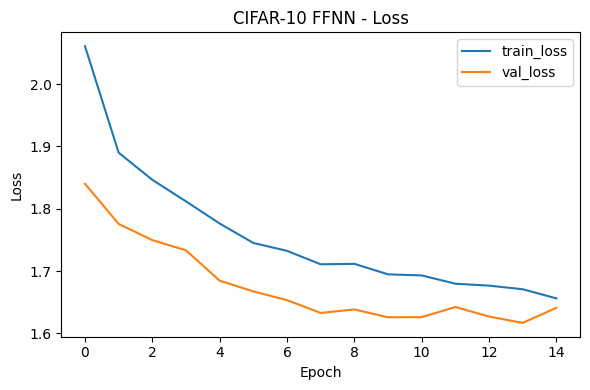

In [17]:
# Plot training vs validation loss
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CIFAR-10 FFNN - Loss")
plt.legend()
plt.tight_layout()
plt.plot

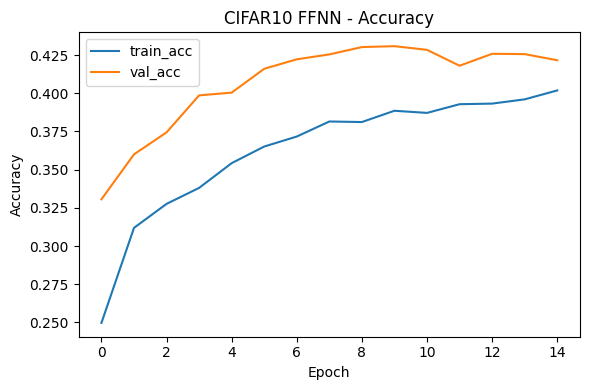

In [18]:
# Plot training vs validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CIFAR10 FFNN - Accuracy")
plt.legend()
plt.tight_layout()
plt.show()